In [22]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
import skimage
from skimage.io import imread
from skimage.transform import resize


In [23]:
data_dir= 'D:\Albot\Medical Imaging-Cancer\code\datasets'

In [24]:
import os
os.listdir(data_dir) 

['Bengin cases', 'Malignant cases', 'Normal cases']

In [25]:
print("No. of images in Bengin cases:", len(os.listdir(data_dir+'\\Bengin cases')))
print("No. of images in Malignant cases:", len(os.listdir(data_dir+'\\Malignant cases')))
print("No. of images in Normal cases:", len(os.listdir(data_dir+'\\Normal cases')))

No. of images in Bengin cases: 120
No. of images in Malignant cases: 561
No. of images in Normal cases: 416


In [26]:
##Loading images in structured directory

def load_image_files(container_path, dimesion=(64,64)):

    image_dir= Path(container_path)
    print("Name of folders:", image_dir)

    folders= [directory for directory in image_dir.iterdir() if directory.is_dir()]
    print("Name of folders:", folders)

    categories = [i.name for i in folders]
    print("Name of categories:", categories)

    descr = "Image classification"
    images= []
    flat_data= []
    target= []

    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img= skimage.io.imread(file)
            #print(img)
            img_resized= resize(img, dimesion, mode='reflect')
            #print(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)

    flat_data= np.array(flat_data)
    #print("flat_data:", flat_data)

    target= np.array(target)
    print("Target:", target)

    images = np.array(images)
    #print("images:", images)

    return Bunch(data= flat_data, target= target, target_names= categories, images= images, DESCR= descr)


In [27]:
#data= r'D:\Albot\Medical Imaging-Cancer\code\datasets'
image_dataset= load_image_files('datasets/')


#print("lenth of data:", len(image_dataset))

Name of folders: datasets
Name of folders: [WindowsPath('datasets/Bengin cases'), WindowsPath('datasets/Malignant cases'), WindowsPath('datasets/Normal cases')]
Name of categories: ['Bengin cases', 'Malignant cases', 'Normal cases']
Target: [0 0 0 ... 2 2 2]


In [28]:
###

In [29]:
####Spliting into test and train

X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.2,random_state=109)

In [30]:
# look at the distrubution of labels in the train set
print("y_train: ", len(y_train), )
print("y_test:", len(y_test))
print("X_train: ", len(X_train))
print("X_test:", len(X_test))


# look at the distrubution of labels in the test set
#print(X_train.value_counts())

y_train:  877
y_test: 220
X_train:  877
X_test: 220


In [32]:
len(y_train),len(X_train) 

(877, 877)

### SVM Method

In [33]:
## Training data with SVM parameter optimization

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC(probability= True)
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
y_pred = clf.predict(X_test)

print("Prediction: ", y_pred)

Prediction:  [1 2 1 0 2 2 2 1 2 1 1 1 0 1 0 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1
 1 2 1 2 2 1 2 0 1 1 0 2 2 2 0 1 2 2 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 1 2 1 1
 1 1 2 1 1 0 2 2 0 2 1 1 1 2 2 2 1 0 0 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 2 2 1 2 2 2 2 2 1 0 1 1 1 2 1 1 2 0 2 1 1 1 1 1 1 2 2 2 0 2 0 1 1
 2 2 2 1 1 2 0 1 1 1 1 1 1 2 1 1 0 2 1 2 2 2 1 1 1 1 0 1 1 1 2 2 0 1 2 1 2
 1 2 2 1 2 1 2 0 1 2 1 1 2 2 2 0 1 1 2 1 1 1 1 2 0 1 1 1 1 1 1 0 2 1 2]


In [35]:
result = pd.DataFrame({'Original' : y_test,'Predicted' : y_pred})

In [36]:
result

,Original,Predicted
0,1,1
1,2,2
2,1,1
3,0,0
4,2,2
...,...,...
215,1,1
216,0,0
217,2,2
218,1,1


In [38]:
# calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.9954545454545455


### Save the classifier

In [39]:
# save the model to disk
import pickle

filename = 'model_Without_Augm_SVM.h5'
pickle.dump(clf, open(filename, 'wb'))

In [40]:
import pickle
filename = 'model_Without_Augm_SVM.h5'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [41]:
loaded_model.predict(X_test)

array([1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2])

In [42]:
# Calculate the Score 
score = loaded_model.score(X_test, y_test) 
print("Score", score)

Score 0.9954545454545455


In [21]:
import skimage
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#!pip install scikit-learn==0.22.1

In [26]:
import pickle
filename = 'model_Without_Augm_SVM.h5'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Model Evaluation

In [27]:
input_image= 'D:\Albot\Medical Imaging-Cancer\code\datasets\Malignant cases\Malignant case (1).jpg'
#input_image= 'D:\Albot\Medical Imaging-Cancer\code\datasets\Bengin cases\Bengin case (1).jpg'
#input_image= r'D:\Albot\Medical Imaging-Cancer\code\datasets\Normal cases\Normal case (2).jpg'

In [28]:
img= imread(input_image)

In [29]:
img.shape

(512, 512, 3)

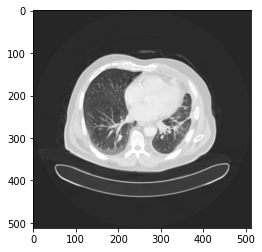

In [30]:
plt.imshow(img)
plt.show()

In [31]:
img_resize=resize(img,(64,64,3))

In [32]:
f =[img_resize.flatten()]

In [1]:
#loaded_model.predict(f)[0]  #loaded_model.predict(f)[0]

In [2]:
#Test_Prediction = loaded_model.predict(f)[0]                    #clf.predict(f)[0]

In [71]:
if Test_Prediction ==0:
    print("Bengin Lung Cancer")
elif Test_Prediction ==1:
    print("Malignant Lung Cancer")
else:
    print("Normal Lung")

Malignant Lung Cancer


### Decesion Tree Method 

In [71]:
from sklearn.tree import DecisionTreeClassifier 

In [72]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)



In [73]:
clf1

DecisionTreeClassifier()

In [76]:
n_nodes = clf1.tree_.node_count

In [77]:
print(n_nodes)

77


In [78]:
print(clf1.tree_.max_depth)

10


In [79]:
#Predict the response for test dataset
y_pred1 = clf1.predict(X_test)

In [80]:
 y_pred1

array([1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2,
       1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 2,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1])

In [81]:
# Model Accuracy, classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9045454545454545


In [82]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf3 = clf3.fit(X_train,y_train)

In [83]:
y_pred3 = clf3.predict(X_test)

In [84]:
# Model Accuracy, classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9363636363636364


### Random Forest classification 

In [85]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [86]:
#Create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100)

In [87]:
#Train the model 
clf2.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
#Predict the response for test dataset
y_pred2 =clf2.predict(X_test)

In [90]:
y_pred2

array([1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2])

In [91]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.9863636363636363


### KNN classification

In [92]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
# Predicting the Test set results
y_pred4 = classifier.predict(X_test)

In [95]:
y_pred4

array([1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2,
       2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2])

In [96]:
from sklearn.metrics import  accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred4))

Accuracy: 0.9818181818181818
